<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/RNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## sprint　ゲート付き　リカレントニューラルネットワーク

### 【問題1】各種手法の実行

LSTM

In [ ]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 2s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\es\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\es\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 142s 176ms/step - loss: 0.5017 - accuracy: 0.7417 - val_loss: 0.3544 - val_accuracy: 0.8453
Epoch 2/15
782/782 [==============================] - 135s 173ms/step - loss: 0.2471 - accuracy: 0.9032 - val_loss: 0.3747 - val_accuracy: 0.8366
Epoch 3/15
782/782 [==============================] - 136s 174ms/step - loss: 0.1538 - accuracy: 0.9434 - val_loss: 0.4340 - val_accuracy: 0.8319
Epoch 4/15
782/782 [==============================] - 137s 175ms/step - loss: 0.1041 - accuracy: 0.9636 - val_loss: 0.5544 - val_accuracy: 0.8266
Epoch 5/15
782/782 [==============================] - 148s 189ms/step - loss: 0.0676 - accuracy: 0.9760 - val_loss: 0.6674 - val_accuracy: 0.8221
Epoch 6/15
782/782 [==============================] - 138s 177ms/step - loss: 0.0573 - accuracy: 0.9794 - val_loss: 0.8

SimpleRNN

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 63s 77ms/step - loss: 0.7046 - accuracy: 0.5203 - val_loss: 0.6646 - val_accuracy: 0.5861
Epoch 2/15
782/782 [==============================] - 61s 79ms/step - loss: 0.6379 - accuracy: 0.6254 - val_loss: 0.6249 - val_accuracy: 0.6459
Epoch 3/15
782/782 [==============================] - 61s 78ms/step - loss: 0.5245 - accuracy: 0.7398 - val_loss: 0.4743 - val_accuracy: 0.7872
Epoch 4/15
782/782 [==============================] - 60s 77ms/step - loss: 0.4647 - accuracy: 0.7850 - val_loss: 0.5206 - val_accuracy: 0.7544
Epoch 5/15
782/782 [==============================] - 62s 80ms/step - loss: 0.4292 - accuracy: 0.8088 - val_loss: 0.5236 - val_accuracy: 0.7772
Epoch 6/15
782/782 [==============================] - 63s 80ms/step - loss: 0.3993 - accuracy: 0.8269 - val_loss:

GRU

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 117s 143ms/step - loss: 0.5181 - accuracy: 0.7214 - val_loss: 0.3501 - val_accuracy: 0.8491
Epoch 2/15
782/782 [==============================] - 108s 138ms/step - loss: 0.2336 - accuracy: 0.9092 - val_loss: 0.3658 - val_accuracy: 0.8453
Epoch 3/15
782/782 [==============================] - 109s 140ms/step - loss: 0.1295 - accuracy: 0.9553 - val_loss: 0.4422 - val_accuracy: 0.8379
Epoch 4/15
782/782 [==============================] - 113s 144ms/step - loss: 0.0709 - accuracy: 0.9768 - val_loss: 0.5910 - val_accuracy: 0.8286
Epoch 5/15
782/782 [==============================] - 114s 146ms/step - loss: 0.0337 - accuracy: 0.9883 - val_loss: 0.8196 - val_accuracy: 0.8060
Epoch 6/15
782/782 [==============================] - 112s 143ms/step - loss: 0.0274 - accuracy: 0.9909

ConvLSTM2D

Epoch 1/15
95/95 [==============================] - 1374s 14s/step - loss: 0.7707 - val_loss: 0.7010
Epoch 2/15
95/95 [==============================] - 1374s 14s/step - loss: 0.7296 - val_loss: 0.7143
Epoch 3/15
95/95 [==============================] - 1372s 14s/step - loss: 0.6980 - val_loss: 0.7197
Epoch 4/15
95/95 [==============================] - 1352s 14s/step - loss: 0.6721 - val_loss: 0.7144
Epoch 5/15
95/95 [==============================] - 1370s 14s/step - loss: 0.6513 - val_loss: 0.7352
Epoch 6/15
95/95 [==============================] - 1369s 14s/step - loss: 0.6339 - val_loss: 0.7555
Epoch 7/15
95/95 [==============================] - 1360s 14s/step - loss: 0.6178 - val_loss: 0.7190
Epoch 8/15
95/95 [==============================] - 1598s 17s/step - loss: 0.6027 - val_loss: 0.6574
Epoch 9/15
95/95 [==============================] - 1622s 17s/step - loss: 0.5884 - val_loss: 0.6158
Epoch 10/15
95/95 [==============================] - 1585s 17s/step - loss: 0.5752 - val_lo

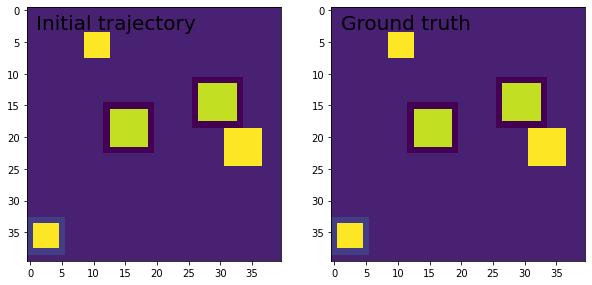

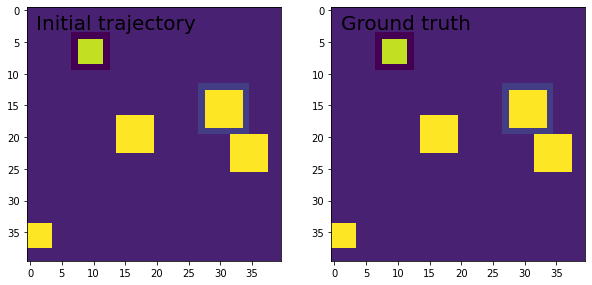

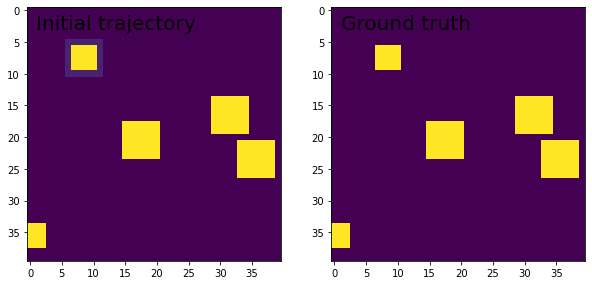

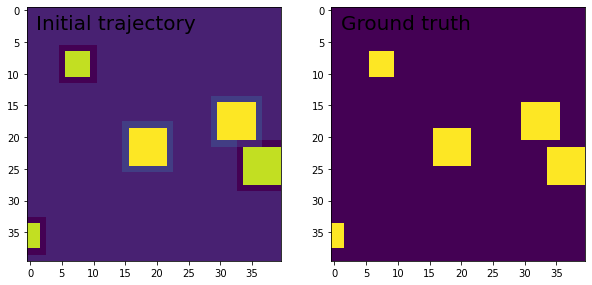

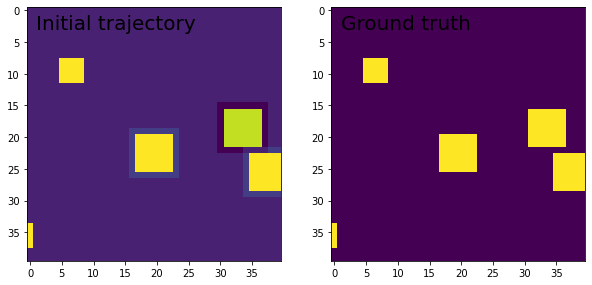

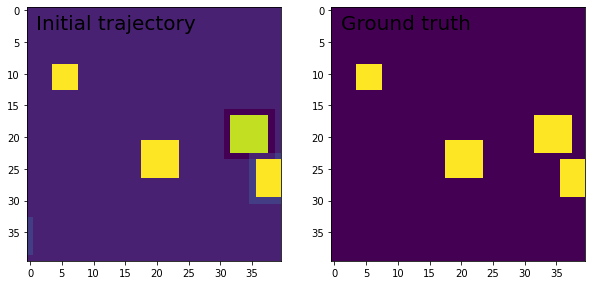

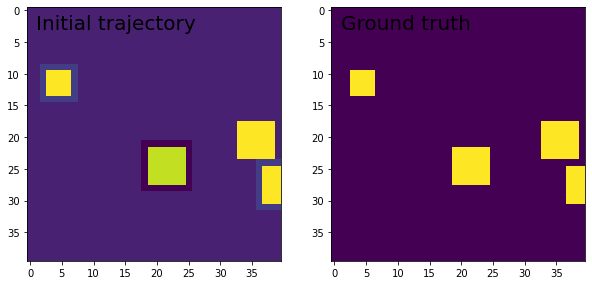

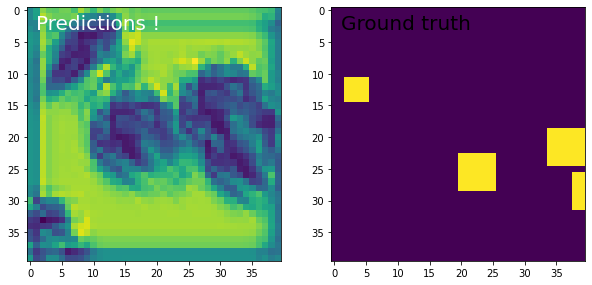

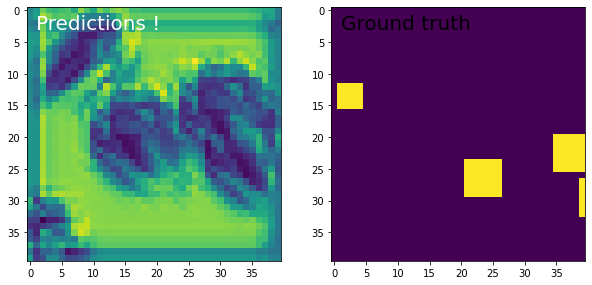

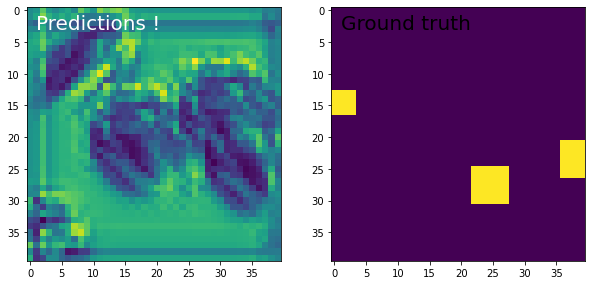

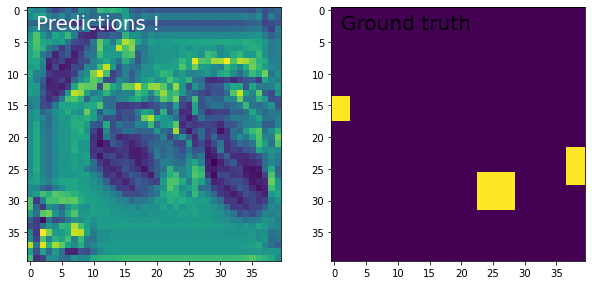

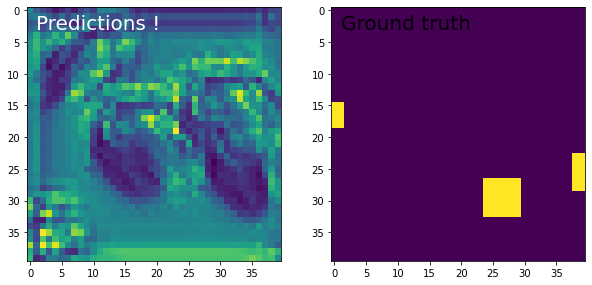

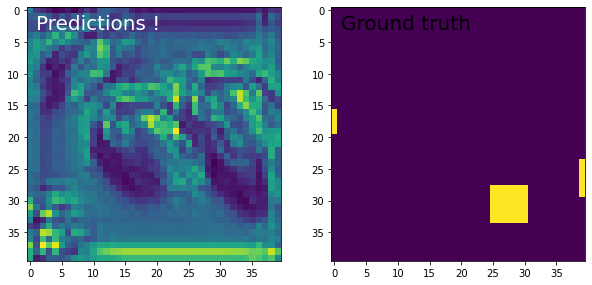

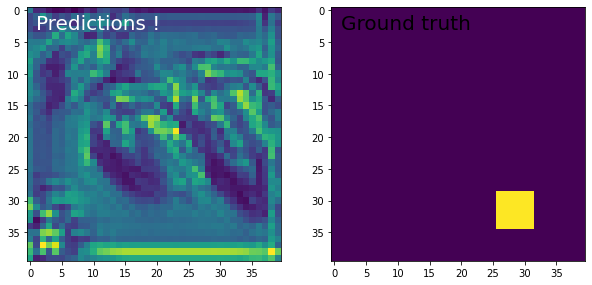

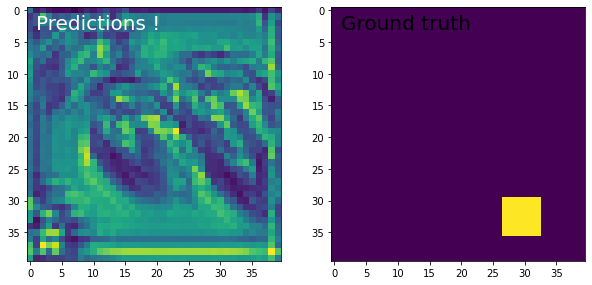

In [ ]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=15, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

```py
1.SimpleRNN
　ある層の出力を再帰的に再入力するRNNモデルであるため、LSTMやGRUのように長期的な出力の保存クラスがないため、
長時間の時系列データでは勾配消失が起こりやすく精度が低いと言われている。そのため、実際の実行時の精度も、
test accuracyが0.66とLSTM、GRUよりも低く、0.66を計上した。

2.LSTM
　SimpleRNNに対して、長期記憶を可能とする層を追加しており、長時間の時系列データにおける勾配消失を防止し、
長時間の依存関係をうまく考慮しながら学習ができるモデル。再入力するデータと入力データからの忘却ゲートと、入力ゲートが
それぞれ異なるモデル。実際の実行時の精度は、test accuracyが0.85であった。

3.GRU
　LSTMに対して、長期記憶の層に対する忘却ゲートと、入力ゲートを一つの更新ゲートで行うことにより、学習パラメータの
数が少なくなる。これにより学習速度を上昇させている。実際の実行時の精度は、test accuracyが0.85でLSTMとほぼ同じであった。
しかし、ステップあたりの処理スピードは、LSTMが平均175msで、GRUが、145msであった。ちなみにSimpleRNNは、平均74msであった。
```

### 【問題2】（アドバンス課題）複数のデータセット間での比較

LSTM

In [ ]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K
from keras.datasets import reuters

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
2113536/2110848 [==============================] - 0s 0us/step


C:\Users\es\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\es\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Epoch 1/15
281/281 [==============================] - 47s 152ms/step - loss: -142.9346 - accuracy: 0.0496 - val_loss: -384.4541 - val_accuracy: 0.0467
Epoch 2/15
281/281 [==============================] - 43s 154ms/step - loss: -453.6418 - accuracy: 0.0454 - val_loss: -666.3463 - val_accuracy: 0.0467
Epoch 3/15
281/281 [==============================] - 44s 156ms/step - loss: -739.6495 - accuracy: 0.0459 - val_loss: -942.8351 - val_accuracy: 0.0467
Epoch 4/15
281/281 [==============================] - 45s 160ms/step - loss: -1003.7561 - accuracy: 0.0506 - val_loss: -1217.8468 - val_accuracy: 0.0467
Epoch 5/15
281/281 [==============================] - 45s 160ms/step - loss: -1279.7862 - accuracy: 0.0522 - val_loss: -1491.8680 - val_accuracy: 0.0467
Epoch 6/15
281/281 [==============================] - 43s 153ms/step - loss: -1541.6107 - accu

SimpleRNN

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras import backend as K
from keras.datasets import reuters

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Epoch 1/15
281/281 [==============================] - 22s 72ms/step - loss: -115.9785 - accuracy: 0.0419 - val_loss: -395.4017 - val_accuracy: 0.0467
Epoch 2/15
281/281 [==============================] - 20s 70ms/step - loss: -474.7598 - accuracy: 0.0503 - val_loss: -693.0249 - val_accuracy: 0.0467
Epoch 3/15
281/281 [==============================] - 20s 70ms/step - loss: -754.7821 - accuracy: 0.0473 - val_loss: -981.3223 - val_accuracy: 0.0467
Epoch 4/15
281/281 [==============================] - 20s 71ms/step - loss: -1050.7254 - accuracy: 0.0497 - val_loss: -1266.2682 - val_accuracy: 0.0467
Epoch 5/15
281/281 [==============================] - 20s 71ms/step - loss: -1346.4085 - accuracy: 0.0496 - val_loss: -1548.5271 - val_accuracy: 0.0467
Epoch 6/15
281/281 [==============================] - 20s 71ms/step - loss: -1610.7

GRU

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb
from keras import backend as K
from keras.datasets import reuters

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Epoch 1/15
281/281 [==============================] - 42s 128ms/step - loss: -161.2701 - accuracy: 0.0526 - val_loss: -418.5016 - val_accuracy: 0.0467
Epoch 2/15
281/281 [==============================] - 35s 125ms/step - loss: -486.0843 - accuracy: 0.0488 - val_loss: -707.3654 - val_accuracy: 0.0467
Epoch 3/15
281/281 [==============================] - 35s 124ms/step - loss: -774.8102 - accuracy: 0.0463 - val_loss: -991.8066 - val_accuracy: 0.0467
Epoch 4/15
281/281 [==============================] - 35s 123ms/step - loss: -1075.4083 - accuracy: 0.0481 - val_loss: -1275.3304 - val_accuracy: 0.0467
Epoch 5/15
281/281 [==============================] - 35s 123ms/step - loss: -1367.7193 - accuracy: 0.0450 - val_loss: -1556.5629 - val_accuracy: 0.0467
Epoch 6/15
281/281 [==============================] - 35s 123ms/step - loss: -

### 【問題3】他のクラスの説明

```py
1.RNN
　通常のDNNでは、ある層からの出力は次の層の入力になるだけであるが、RNNでは時系列データを扱うため、
出力が再帰的にその層の再入力に使用される。これにより時系列に基づくデータの相関性が意識され、学習されるモデル。

2.SimpleRNNCell
　SimpleRNNに対するcellクラスを実装したモデル。cellクラスとは、ある層の出力を再帰的にその層の再入力に使用するクラスである。
　以下、「～Cell」も同様のクラスを実装したモデルである。

3.GRUCell
　GRUに対するcellクラスを実装したモデル

4.LSTMCell
　LSTMに対するcellクラスを実装したモデル

5.StackedRNNCells
　RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー

6.CuDNNGRU
　NVIDIA GPU and CuDNN がインストールされたマシン上で、CuDNNでビルドすることが可能。
CuDNNを利用することによりGRUを高速化する。TensorFlowバックエンドでGPU上でのみ動作。

7.CuDNNLSTM
　NVIDIA GPU and CuDNN がインストールされたマシン上で、CuDNNでビルドすることが可能。
CuDNNを利用することによりLSTMを高速化する。TensorFlowバックエンドでGPU上でのみ動作。
```